# Модуль 2. Занятие 3. Обучение без учителя
## Часть 2. Кластеризация. Метрики качества и метод К-средних

Кластеризация — это задача разделения данных на группы (кластеры), так чтобы данные внутри каждой группы были максимально похожими, а данные из разных групп — максимально отличались.

<br><i>Пример:</i> если у вас есть данные о клиентах, кластеризация может сгруппировать их по поведению (активность, покупки).



### Как оценить качество кластеризации?
Оценка качества кластеризации сложнее, чем у классификации, потому что:

- Иногда нет "правильных меток" (мы не знаем заранее, в каком кластере должен быть объект).
- Нужно сравнить результат кластеризации с некоторыми критериями.
<br><br>Есть два основных подхода:

1. Внешние метрики: используют известные правильные метки данных.
2. Внутренние метрики: оценивают качество кластеров без знаний о правильных метках.

### Adjusted Rand Index (ARI)

Предполагается, что известны истинные метки объектов. Данная мера не зависит от самих значений меток, а только от разбиения выборки на кластеры. Пусть $N$ – число объектов в выборке. Обозначим через $a$ число пар объектов, имеющих одинаковые метки и находящихся в одном кластере, через $b$ – число пар объектов, имеющих различные метки и находящихся в разных кластерах. Тогда Rand Index это $$\text{RI} = \frac{2(a + b)}{N(N-1)}.$$ То есть это доля объектов, для которых эти разбиения (исходное и полученное в результате кластеризации) "согласованы". Rand Index (RI) выражает схожесть двух разных кластеризаций одной и той же выборки. Чтобы этот индекс давал значения близкие к нулю для случайных кластеризаций при любом $N$ и числе кластеров, необходимо нормировать его. Так определяется Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Эта мера симметрична, не зависит от значений и перестановок меток. Таким образом, данный индекс является мерой расстояния между различными разбиениями выборки. $\text{ARI}$ принимает значения в диапазоне $[-1, 1]$. Значения, близкие к нулю соответствуют случайным разбиениям, а положительные значения говорят о том, что два разбиения схожи (совпадают при $\text{ARI} = 1$).



<b>Простое объяснение</b>:<br>
Представьте, что у вас есть пара объектов (например, два клиента). ARI проверяет:

- Если они в одном кластере в вашем разбиении и в истинных данных — это совпадение.
- Если они в разных кластерах и в вашем разбиении, и в истинных данных — это тоже совпадение.<br><br>
Интерпретация:

- ARI=1: идеальное совпадение с истинными метками.

- ARI=0: случайное разбиение.

- ARI<0: кластеризация хуже случайного.

### Adjusted Mutual Information (AMI)

Данная мера очень похожа на $\text{ARI}$. Она также симетрична, не зависит от значений и перестановок меток. Определяется с использованием функции [энтропии](https://en.wikipedia.org/wiki/Entropy_(information_theory), интерпретируя разбиения выборки, как дискретные распределения (вероятность отнесения к кластеру равна доле объектов в нём). Индекс $MI$ определяется как  [взаимная информация](https://en.wikipedia.org/wiki/Mutual_information) для двух распределений, соответствующих разбиениям выборки на кластеры. Интуитивно, взаимная информация измеряет долю информации, общей для обоих разбиений: насколько информация об одном из них уменьшает неопределенность относительно другого.

Аналогично $\text{ARI}$ определяется индекс $\text{AMI}$, позволяющий избавиться от роста индекса $MI$ с увеличением числа классов. Он принимает значения в диапазоне $[0, 1]$. Значения, близкие к нулю, говорят о независимости разбиений, а близкие к единице – об их схожести (совпадении при $\text{AMI} = 1$).

<b>Простое объяснение:</b>
Если объекты в одном разбиении (кластерах) часто совпадают с объектами в другом разбиении, это говорит о схожести.

Интерпретация:
- AMI=1: идеальное совпадение.
- AMI=0: разбиения независимы (нет совпадений).

### Силуэт

В отличие от описанных выше метрик, данный коэффициент не предполагает знания истинных меток объектов и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации. Сначала силуэт определяется отдельно для каждого объекта. Обозначим через $a$ – среднее расстояние от данного объекта до объектов из того же кластера, через $b$ – среднее расстояние от данного объекта до объектов из ближайшего кластера (отличного от того, в котором лежит сам объект). Тогда силуэтом данного объекта называется величина: $$s = \frac{b - a}{\max(a, b)}.$$
Силуэтом выборки называется средняя величина силуэта объектов данной выборки. Таким образом, силуэт показывает, на сколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Данная величина лежит в диапазоне $[-1, 1]$. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным", четко выделенным кластерам. Таким образом, чем больше силуэт, тем более четко выделены кластеры, и они представляют собой компактные, плотно сгруппированные облака точек.

С помощью силуэта можно выбирать оптимальное число кластеров $k$ (если оно заранее не известно) – выбирается число кластеров, максимизирующее значение силуэта. В отличие от предыдущих метрик, силуэт зависит от формы кластеров и достигает больших значений на более выпуклых кластерах, получаемых с помощью алгоритмов, основанных на восстановлении плотности распределения.

<b>Простое объяснение:</b>
Если объект близок к другим объектам своего кластера и далёк от объектов других кластеров, это хороший результат.

Интерпретация:
- Score>0: объект находится внутри кластера.
- Score=0: объект находится между кластерами.
- Score<0: объект "неправильно" кластеризован.

## Алгоритм К-средних (KMeans)

Что делает К-средних?

- Разделяет данные на группы (кластеры), чтобы объекты внутри одной группы были похожи, а объекты из разных групп отличались.
- Каждый кластер имеет центр (называемый центроидом), вокруг которого группируются данные.

Метод k-means – это один из наиболее популярных методов кластеризации. Основная идея метода заключается в том, что на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры согласно тому, какой из новых центроидов находится ближе.

Более формально, алгоритм принимает на вход выборку $X_1, \dots, X_N$ и параметр $k$, указывающий необходимое число кластеров. Выходом алгоритма является набор из $k$ центроидов $\{\mu_1, \dots, \mu_k\}$, с помощью которых кластеризация осуществляется путём отнесения каждого объекту к ближайшему центроиду. Все точки внутри одного кластера ближе к центроиду этого кластера, чем к центроиду любого другого кластера.

Метод может быть сформулирован как задача оптимизации, а именно, минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров по центроидам и кластерам:
$$\sum_{i=1}^k \sum_{X_n \in C_i} ||X_n - \mu_i||^2 \rightarrow \min, \text{где $C_i$ - это $i$-ый кластер, $\mu_i$ - это центр масс кластера $C_i$.}$$

Решение такой задачи оптимизации является NP-трудной задачей, однако существует простой итеративный алгоритм, позволяющий найти локальный минимум указанного функционала. Алгоритм представляет собой последовательное чередование двух шагов до сходимости. 

Предположим, что как-то (например, случайно) выбраны начальные положения центроидов $\mu_1, \dots, \mu_k$.

1) *Этап кластеризациu.* На данном этапе происходит кластеризация выборки, как было описано выше: каждый объект относится к кластеру ближайшего к нему центроида. Формально, $$C_i = \{X_n : ||X_n - \mu_i|| \leq ||X_n - \mu_j||, \text{ для всех $j \in \{1, \dots, k\}$}\}.$$

2) *Этап обновления центроидов.* На данном этапе центроиды пересчитываются, как центры масс только что построенных кластеров. Формально, $$\mu_i = \frac{1}{|C_i|}\sum_{X_n \in C_i} X_n.$$

Этот процесс продолжается, пока центроиды и кластеризация продолжают изменяться. Алгоритм гарантированно сходится, однако не гарантируется достижение глобального минимума – а только одного из локальных минимумов. Другим недостатком алгоритма является то, что итоговая кластеризация зависит от выбора исходных центров кластеров. На практике алгоритм запускается несколько раз из различных начальных приближений, а полученные результаты некоторым образом усредняются. Стоит также отметить, что число кластеров необходимо знать заранее. Существуют различные эвристики, позволяющие выбирать в некотором смысле оптимальное число кластеров.

### Пример: кластеризация игроков NBA

Задача: Разделить игроков NBA на группы (кластеры) по их статистике, чтобы понять, какие группы игроков имеют схожие игровые характеристики.

In [15]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

nba = pd.read_csv("./data/nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


C:\Users\khusn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khusn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


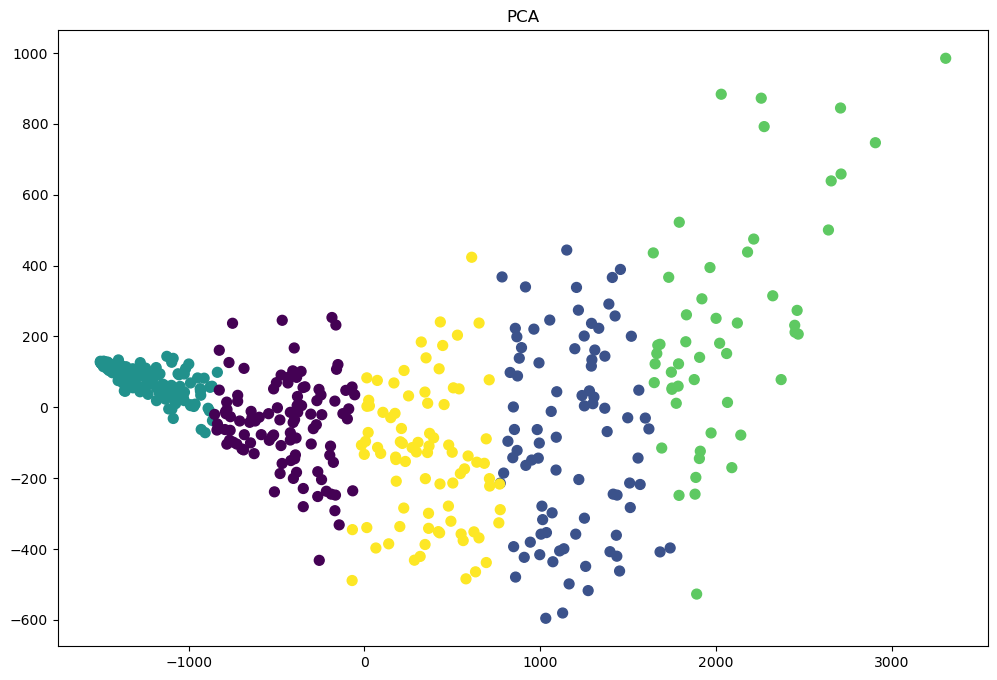

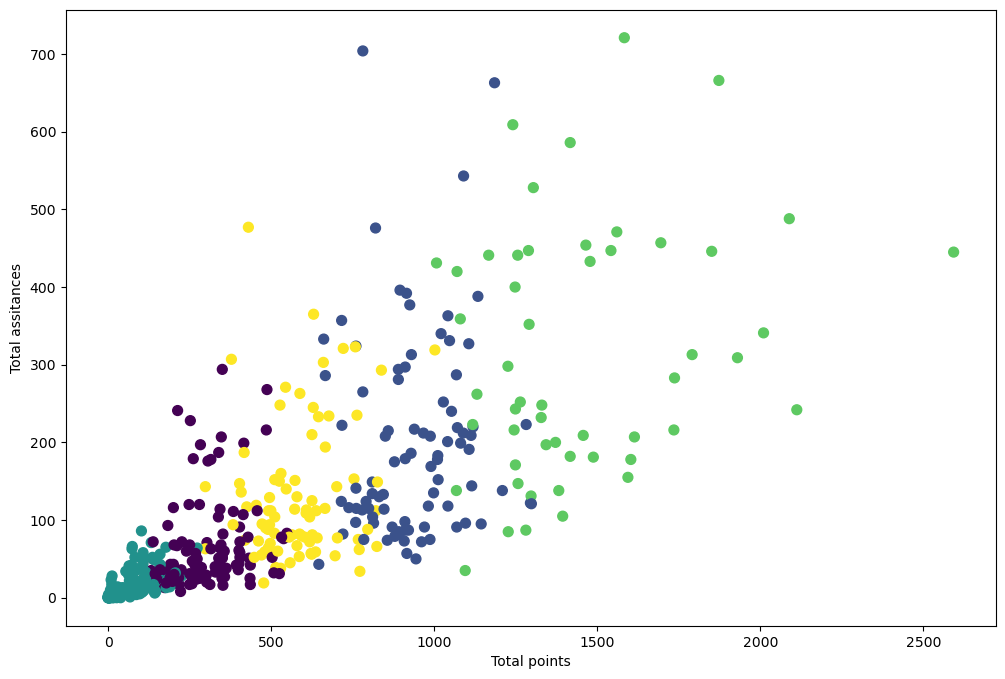

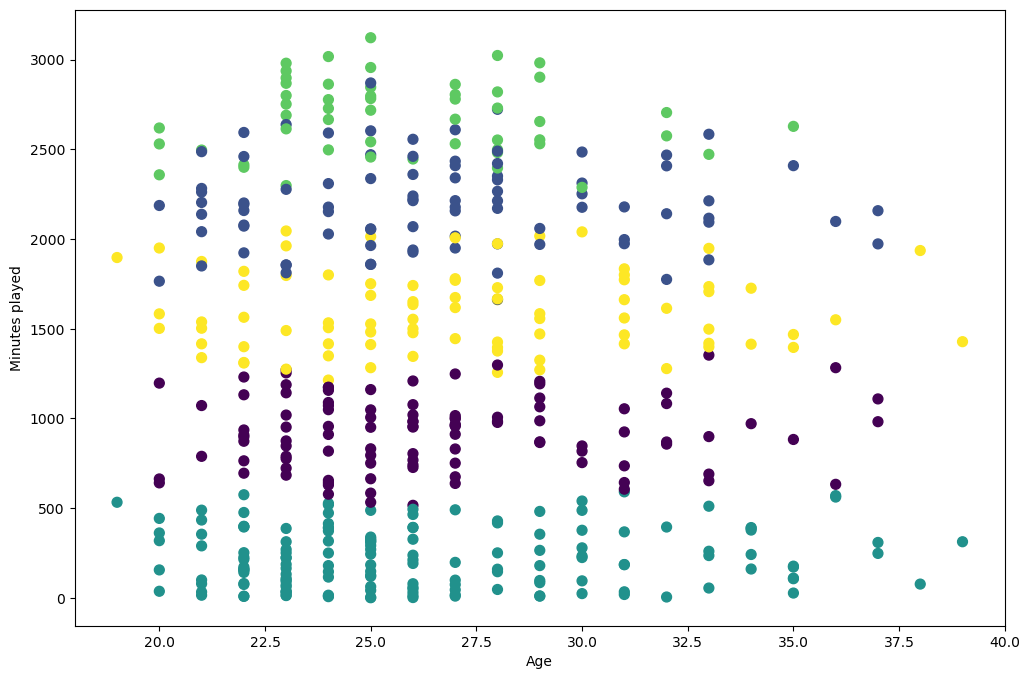

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#делим игроков на 5 кластеров
kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)


# Visualizing using PCA
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Visualizing using 2 features: Total points vs. Total assists (очки-подачи)
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Total points')
plt.ylabel('Total assitances')

# Visualizing using 2 features: Age vs. Minutes played (возраст-время)
plt.figure(figsize=(12,8))
plt.scatter(nba['age'], nba['mp'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Minutes played');

### Инициализация центроидов

Метод `sklearn.KMeans` содержит параметры `n_init` (число запусков из различных начальных приближений) и `init`. Есть три способа инициализации центроидов:
- `k-means++` – "умная" инициализация центроидов для ускорения сходимости.
- `random` – случайная инициализация центроидов.
- `ndarray` – заданная инициализация центроидов.

По умолчанию используется умная инициализация с 10-ю запусками.

## Сжатие изображений с K-means

Одно из применений алгоритма - сжатие изображений. Этот код выполняет кластеризацию пикселей изображения с использованием метода MiniBatchKMeans для сжатия изображения.

Вместо обработки всех данных сразу, алгоритм работает с небольшими "пакетами" (mini-batches), что делает его эффективным для работы с изображениями, где данных (пикселей) много.

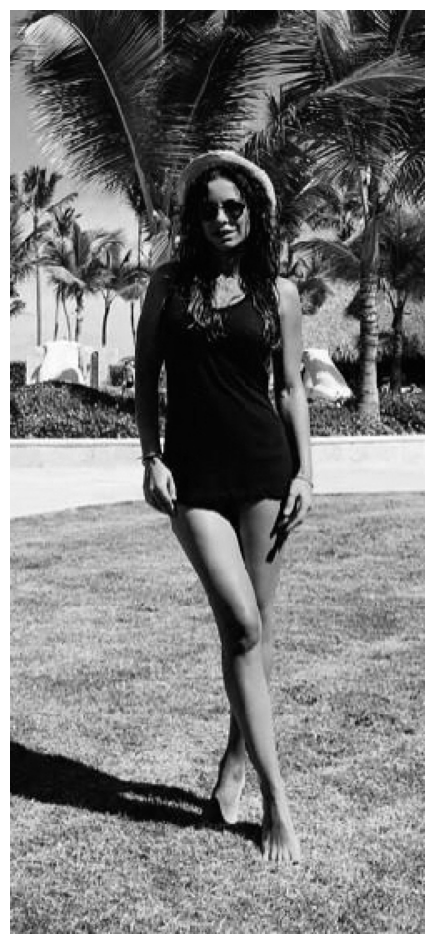

In [19]:
import matplotlib.image as mpimg

img = mpimg.imread('./img/woman.jpg')[..., 1]
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img, cmap='gray');

C:\Users\khusn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khusn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


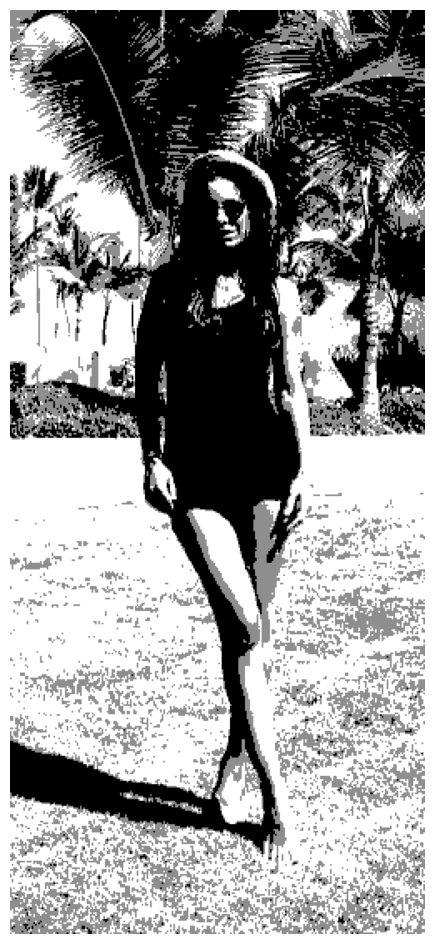

In [21]:
from scipy.stats import randint
from sklearn.cluster import MiniBatchKMeans

X = img.reshape((-1, 1)) # преобразуем изображение в одномерный массив пикселей
k_means = MiniBatchKMeans(n_clusters=3) # используем три кластера - получаем три оттенка
k_means.fit(X) 
values = k_means.cluster_centers_ 
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape) # все пиксели изображения заменяются на значение центроида их кластера
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');

# Нахождение тем в текстах

**Применим KMeans для кластеризации текстов из 4 новостных категорий.**

In [23]:
from time import time

from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import Normalizer

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


**Закодируем тексты с помощью TF-IDF признаков.** 
Оценка важности слов

In [27]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3387, n_features: 1000


**И применим к получившимся векторам метод $k$ средних.**

In [33]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=10)
Homogeneity: 0.490
Completeness: 0.571
V-measure: 0.527
Adjusted Rand-Index: 0.496
Silhouette Coefficient: 0.016


- Homogeneity: 0.490 (измеряет "однородность" кластера)
- Completeness: 0.535 (измеряет насколько все объекты одного класса находятся в одном кластере)
- V-measure: 0.511 (гармоническое среднее между Homogeneity и Completeness)
- Adjusted Rand-Index: 0.490 (сравнивает разбиение на кластеры с истинным разбиением)
- Silhouette Coefficient: 0.017 (измеряет насколько объекты внутри одного кластера похожи друг на друга и насколько они отличаются от объектов в других кластерах)

**Выведем слова, соответствующие самым весомым компонентам центров кластеров.**

In [31]:
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: graphics com university posting host nntp thanks computer image ac
Cluster 2: god com people sandvik jesus don article christian say think
Cluster 3: keith sgi livesey caltech jon wpd solntze com schneider cco
Cluster 4: space nasa access henry digex gov pat toronto alaska shuttle


## Кластеризация рукописных цифр

In [35]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [37]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

C:\Users\khusn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khusn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=10)

In [39]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, kmeans.predict(X))

0.6633014103717477

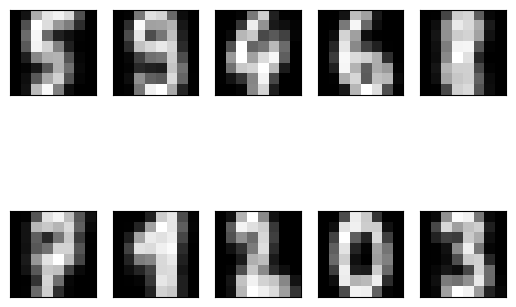

In [41]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())